In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-25,87471.703125,88542.398438,86346.078125,87512.820312,30005840049
2025-03-26,86900.882812,88292.156250,85861.453125,87460.234375,26704046038
2025-03-27,87177.101562,87786.726562,85837.937500,86896.257812,24413471941
2025-03-28,84353.148438,87489.859375,83557.640625,87185.234375,34198619509
2025-03-30,83161.281250,83430.406250,82491.007812,82618.156250,17013304320


In [5]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3847.0,2.128001e+04,2.454027e+04,1.781030e+02,1.567125e+03,9.630664e+03,3.450259e+04,1.061463e+05
High,BTC-USD,3847.0,2.173039e+04,2.504144e+04,2.117310e+02,1.602815e+03,9.793269e+03,3.527019e+04,1.091149e+05
Low,BTC-USD,3847.0,2.076181e+04,2.396951e+04,1.715100e+02,1.536405e+03,9.411521e+03,3.342087e+04,1.052917e+05
Open,BTC-USD,3847.0,2.125925e+04,2.452264e+04,1.768970e+02,1.548840e+03,9.629325e+03,3.448782e+04,1.061473e+05
Volume,BTC-USD,3847.0,1.917995e+10,2.079272e+10,5.914570e+06,6.722555e+08,1.532356e+10,3.039909e+10,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3847 entries, 2014-09-17 to 2025-03-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3847 non-null   float64
 1   (High, BTC-USD)    3847 non-null   float64
 2   (Low, BTC-USD)     3847 non-null   float64
 3   (Open, BTC-USD)    3847 non-null   float64
 4   (Volume, BTC-USD)  3847 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 180.3 KB


In [7]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
closing_price = stock_data[['Close']]

In [9]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-25,87471.703125
2025-03-26,86900.882812


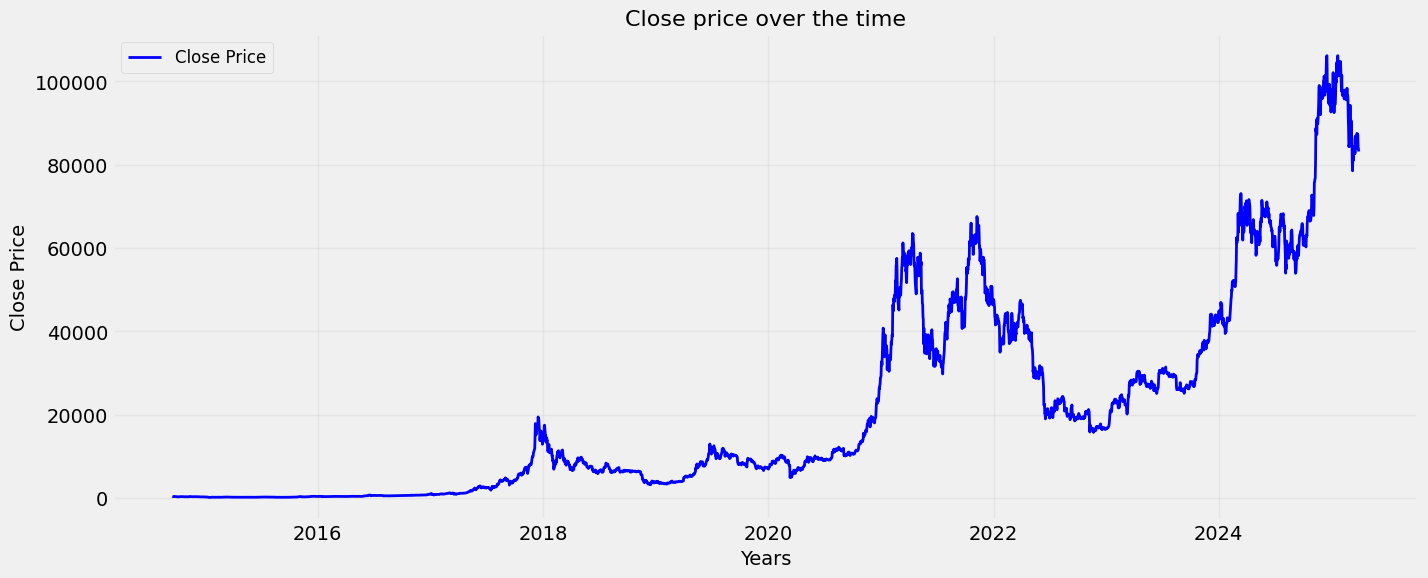

In [10]:
plt.figure(figsize= (15, 6)) 
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color= 'blue', linewidth= 2)
plt.title("Close price over the time", fontsize = 16)
plt.xlabel("Years", fontsize =14)
plt.ylabel("Close Price", fontsize =14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print (sum(temp_data [1:6])/5)

40.0


In [12]:
df0 = pd.DataFrame(temp_data)

In [13]:
df0.rolling(5). mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range (2014,2025):
    print (i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [15]:
closing_price ['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price ['MA_100'] = closing_price['Close'].rolling(window=100).mean()

C:\Users\bajaj\AppData\Local\Temp\ipykernel_16876\2257691369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price ['MA_365'] = closing_price['Close'].rolling(window=365).mean()
C:\Users\bajaj\AppData\Local\Temp\ipykernel_16876\2257691369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price ['MA_100'] = closing_price['Close'].rolling(window=100).mean()


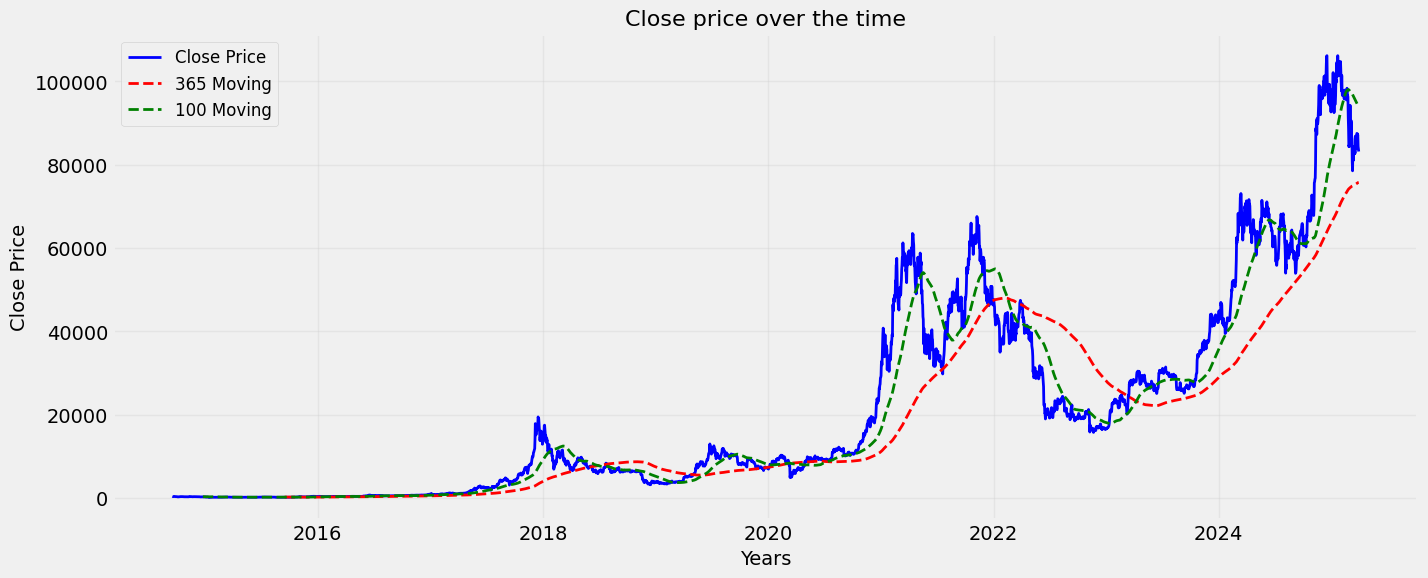

In [16]:
plt.figure(figsize= (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color= 'blue', linewidth= 2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Moving', color= 'red',linestyle= "--", linewidth= 2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Moving', color= 'green',linestyle= "--", linewidth= 2)

plt.title("Close price over the time", fontsize = 16)
plt.xlabel("Years", fontsize =14)
plt.ylabel("Close Price", fontsize =14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [18]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.82099186],
       [0.79434279],
       [0.78309538]])

In [19]:
len(scaled_data)

3847

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
#prepare data for LSTM
x_data =[]
y_data =[]
base_days = 100
for i in range (base_days, len(scaled_data)):
    x_data.append(scaled_data[i - base_days :i])
    y_data.append(scaled_data[i])
x_data =np.array(x_data)
y_data =np.array(y_data)

In [22]:
train_size = int (len(x_data) * 0.9 )
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [23]:
model = Sequential([
    LSTM (128, return_sequences=True, input_shape = (x_train.shape[1], 1)),
    LSTM (64, return_sequences=False),
    Dense(25),
    Dense(1)
])

d:\Codes\python\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [42]:
model.fit(x_train, y_train, batch_size=50, epochs=20)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 8.9554e-05
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 7.1160e-05
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 7.5015e-05
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 7.8576e-05
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 9.6412e-05
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 6.8747e-05
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 9.6845e-05
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 6.8670e-05
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 8.4165e-05
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 7.5559e-05
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 7.7666e-05
Epoch 12/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 9.0581e-05
Epoch 13/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 6.7773e-05
Epoch 14/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 6.7153e-05


In [43]:
prediction = model.predict(x_test)
inv_prediction = scaler.inverse_transform(prediction)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


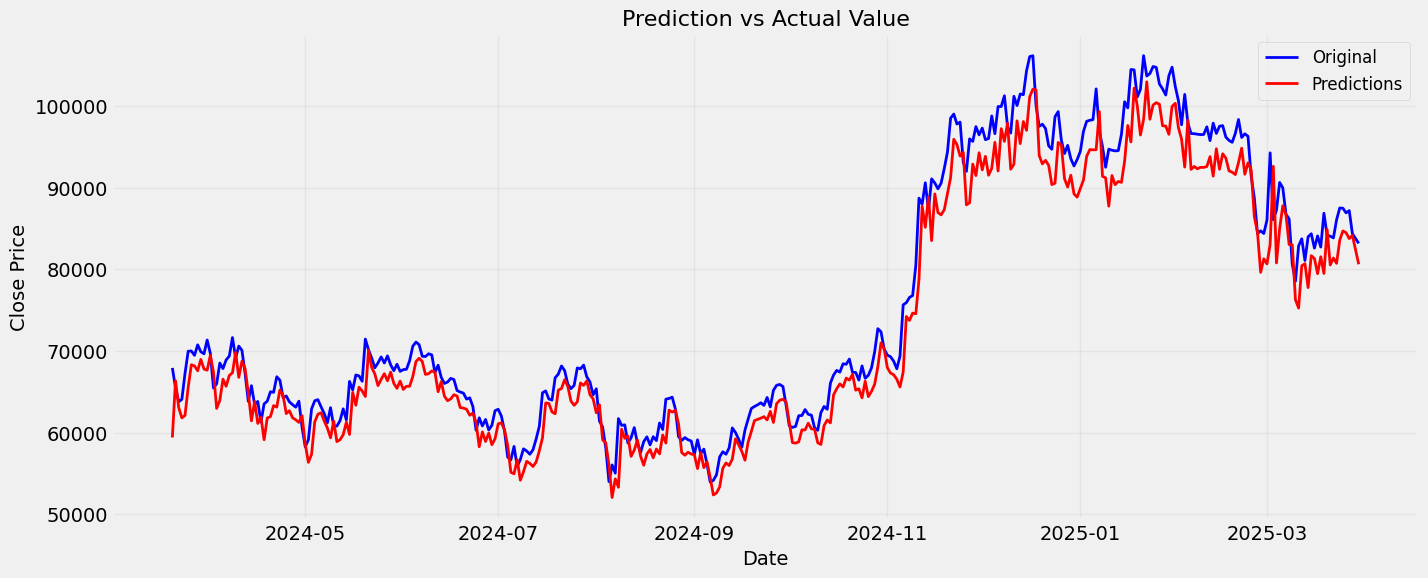

In [44]:
plotting_data = pd.DataFrame(
    {
        'Original' : inv_y_test.flatten(),
        'Predictions' : inv_prediction.flatten()
    }, index=closing_price.index[train_size + base_days:]
)

import matplotlib.pyplot as plt

# Assuming plotting_data is your DataFrame
plt.figure(figsize=(15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label='Original', color='blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Predictions'], label='Predictions', color='red', linewidth=2)

plt.title("Prediction vs Actual Value", fontsize=16)
plt.xlabel("Date", fontsize=14)  # Changed to "Date" for clarity
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

plt.show()

In [45]:
last_100 =scaled_data[-100:].reshape( 1, -1, 1)
future_predictions =[]
for _ in range (10):
    
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis= 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [46]:
last_100

array([[[0.87257442],
        [0.87999167],
        [0.88933933],
        [0.91262101],
        [0.92413914],
        [0.92535457],
        [0.92609757],
        [0.96160942],
        [0.91295912],
        [0.89522568],
        [0.87107235],
        [0.89199763],
        [0.89072499],
        [0.88998745],
        [0.89025249],
        [0.90929145],
        [0.94675973],
        [0.93970491],
        [0.9841063 ],
        [0.983597  ],
        [0.95228136],
        [0.96102979],
        [1.        ],
        [0.97647222],
        [0.97937028],
        [0.98747944],
        [0.98649012],
        [0.96731315],
        [0.96170002],
        [0.95457325],
        [0.97694539],
        [0.98668505],
        [0.96469466],
        [0.9481886 ],
        [0.92019028],
        [0.95526162],
        [0.92191574],
        [0.91005959],
        [0.90985058],
        [0.90924463],
        [0.90880457],
        [0.90897104],
        [0.91781767],
        [0.9018683 ],
        [0.92204823],
        [0

In [47]:
future_predictions

[array([[79906.29]], dtype=float32),
 array([[76122.26]], dtype=float32),
 array([[72507.4]], dtype=float32),
 array([[69008.14]], dtype=float32),
 array([[65714.94]], dtype=float32),
 array([[62667.08]], dtype=float32),
 array([[59880.07]], dtype=float32),
 array([[57353.266]], dtype=float32),
 array([[55075.74]], dtype=float32),
 array([[53030.297]], dtype=float32)]

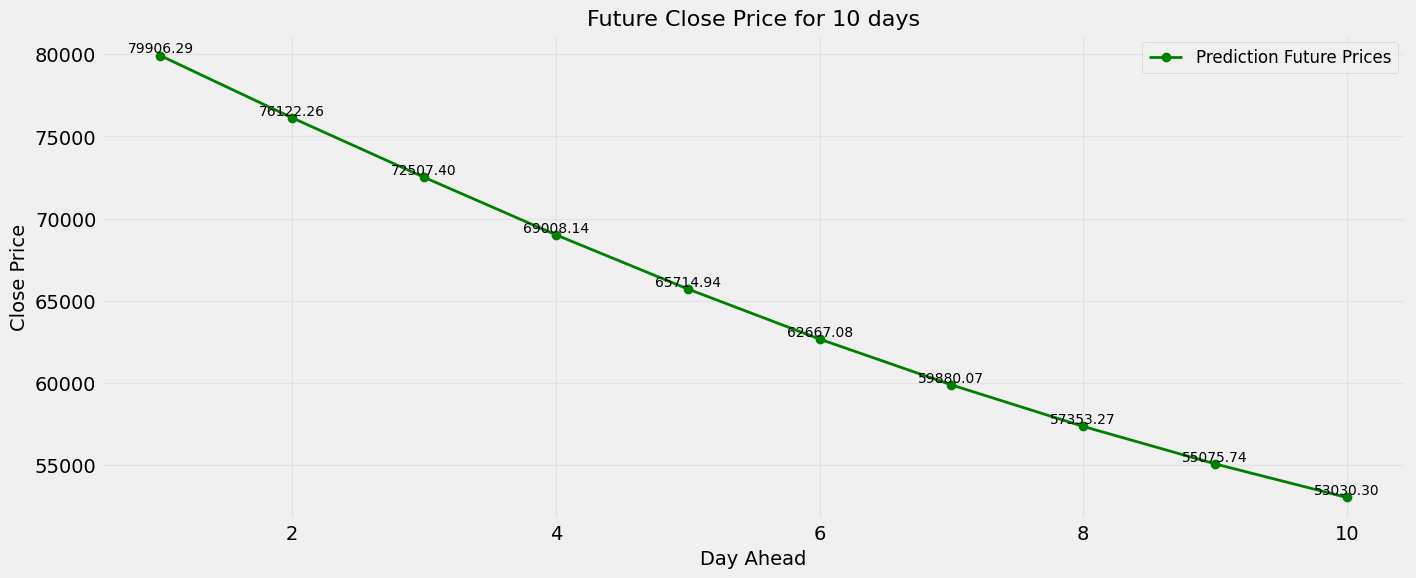

In [48]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize=(15, 6))
plt.plot(range(1, 11), future_predictions,marker = "o", label='Prediction Future Prices', color='green', linewidth=2)

for i, val in enumerate(future_predictions):
    plt.text(i+1, val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'black')

plt.title("Future Close Price for 10 days", fontsize=16)
plt.xlabel("Day Ahead", fontsize=14)  # Changed to "Date" for clarity
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

plt.show()

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print("Model accuracy:", accuracy)

ValueError: continuous is not supported

In [49]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [50]:
import keras
print(keras.__version__)


3.7.0


In [51]:
import os
print(os.path.exists("model.keras"))


True


In [54]:
model.save("keras_model.h5")